Plot the lat/lon for a raw gpsd log

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import json
import folium
from folium import plugins
import mapit
import importlib
importlib.reload(mapit)


<module 'mapit' from '/home/greg/rn1/remnav/metadata/cmd/gpsd/mapit.py'>

In [3]:
LOG = '/home/greg/rn1/remnav/metadata/gpsd/gpsd.rn5.log'
HTML = '/home/greg/rn1/remnav/metadata/gpsd/gpsd.rn5.html'
LOG = '/home/greg/rn1/remnav/metadata/gpsd/gpsd.rn3'
HTML = '/home/greg/rn1/remnav/metadata/gpsd/gpsd.rn3.html'
LOG = '/home/greg/rn1/remnav/metadata/cmd/gpsd/gpsd.rn5.log'
HTML = '/home/greg/rn1/remnav/metadata/cmd/gpsd/gpsd.rn5.html'

In [4]:

df = mapit.read(LOG)
m = mapit.html_map(df)
m.save(HTML)
m

In [5]:
np.any(np.isnan(df.hdop))

False

In [10]:
def ecdf(x):
  xs = np.sort(x[~x.isna()])
  ps = np.arange(1, 1 + len(xs)) / len(xs)
  return xs, ps
    

Text(0.5, 0, 'UTC')

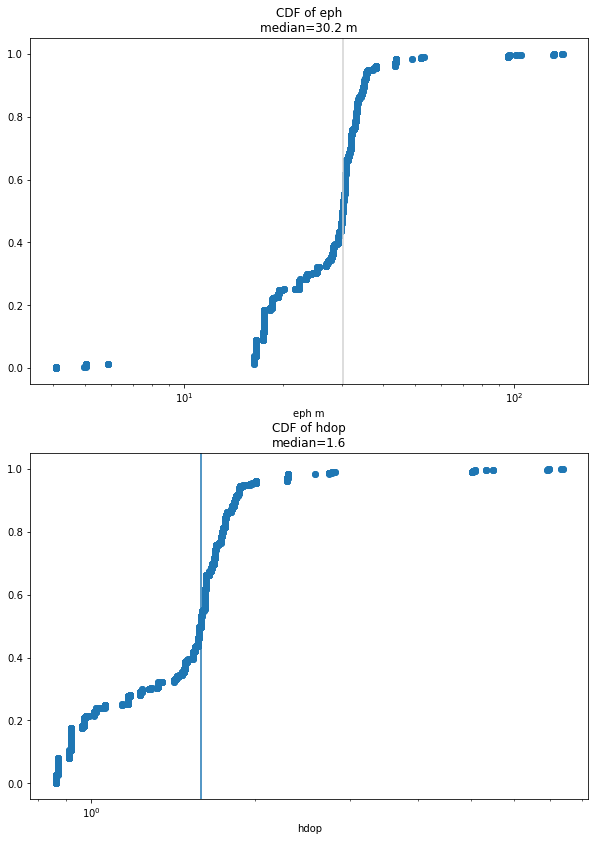

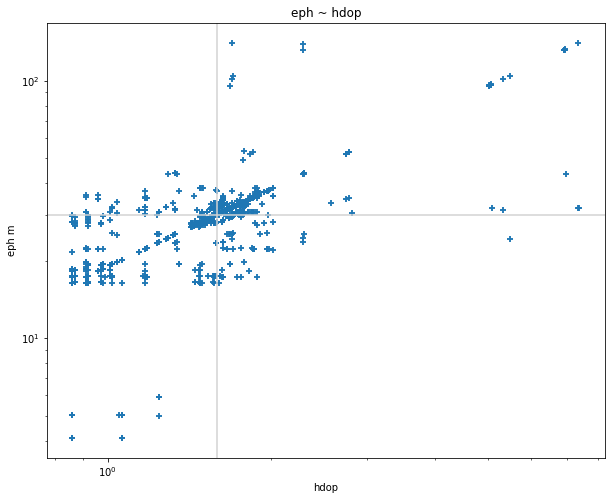

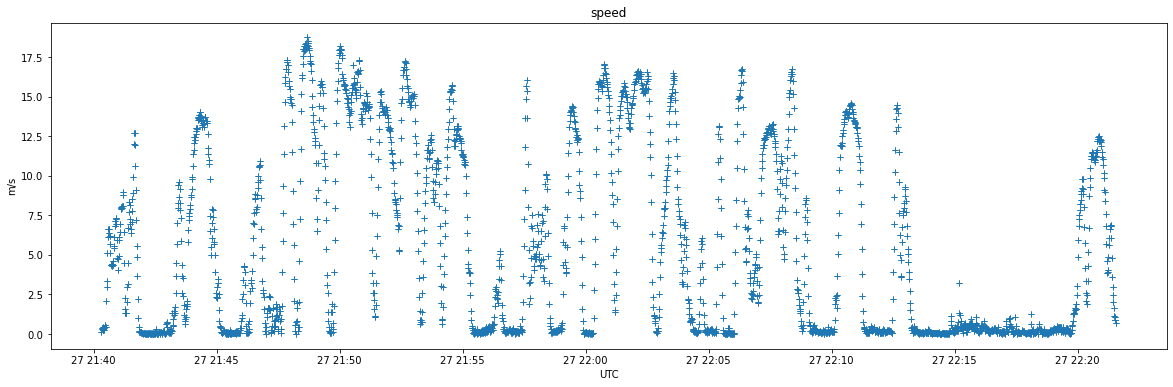

In [11]:
xs, ps = ecdf(df.eph)
fig, axes = plt.subplots(nrows=2, ncols=1, squeeze=False, figsize=(10, 2*7))
ax = axes[0, 0]
ax.set_xscale('log')
ax.scatter(xs, ps)
ax.axvline(np.median(df.eph),c='lightgrey')
ax.set_title('CDF of eph\nmedian=%.1f m' % (np.median(df.eph)))
ax.set_xlabel('eph m')

ax = axes[1, 0]
ax.set_xscale('log')
xs, ps = ecdf(df.hdop)
ax.scatter(xs, ps)
ax.axvline(np.median(df.hdop))
ax.set_title('CDF of hdop\nmedian=%.1f' % (np.median(df.hdop)))
ax.set_xlabel('hdop')

fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=(10, 8))
ax = axes[0, 0]
ax.set_xscale('log')
ax.set_yscale('log')
ax.scatter(df['hdop'], df['eph'], marker='+')
ax.axvline(np.median(df.hdop), c='lightgrey')
ax.axhline(np.median(df.eph), c='lightgrey')
ax.set_xlabel('hdop')
ax.set_ylabel('eph m')
ax.set_title('eph ~ hdop')

fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=(20,6))
ax = axes[0, 0]
ax.plot_date(df.utc, df.speed, marker='+')
ax.set_title("speed")
ax.set_ylabel("m/s")
ax.set_xlabel("UTC")